In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#modules to find path of all sessions
import glob
import os
import numpy as np
import pickle
import platform
import math
from IPython.display import clear_output, display, HTML
from matplotlib.patches import Rectangle
from matplotlib import collections  as mc
import matplotlib.gridspec as gridspec
from scipy.ndimage.filters import gaussian_filter as smooth
import matplotlib
from __future__ import print_function
np.set_printoptions(precision=3, suppress=True)
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

### you might need to change the line below if you want to regenerate the figure on a differente computer 
### Below we will run some preprocessing notebooks. In our case, our preprocessing notebooks are located in 
### a folder ("load_preprocess_mouse") which is at the same level that the folder that contain the notebooks 
### that generate the figures (for instance this one)


notebookPath=os.path.dirname(os.path.realpath("__file__"))
pathToProcessingNotebooks=os.path.join(os.path.split(notebookPath)[0],"load_preprocess_mouse")
os.chdir(pathToProcessingNotebooks)   
%run loadMouse_documentation.ipynb
%run loadRawSpike_documentation.ipynb
%run plotMouse_Behavior.ipynb


#######

def has_tag(root, animal, session, tagList):
    """ Test if the session has at least one of the tag in tagList
    tag = empty file with a specific name, in a session folder
    """
    fullPath = os.path.join(root, animal, "Experiments", session)
    fileList = os.listdir(fullPath)
    for tag in tagList:
        if tag in fileList:
            return True
    return False

def cm2inch(value):
    return value/2.54
    

#Those parameters are overwritten if there is a .behav_param file
paramCarola={
    "distanceToRun":100,
    "maxTrialDuration": 60,
    "valveONTime":50,
    "minInterTrialDuration":15,
    "immobilityDuration":2,
    #to read .eeg (put None to not read .eeg)
    "nChannelElectro":32, #32
    "channel_opto": -6, #not used
    "channel_lickBreak":-5,
    "channel_reward": -4, #not used currently
    "channel_sound": -3, #not used
    "channel_trialON": -2,
    "channel_beamBreak": -1,
}    


#### root is the path to the folder where the data (MOUXXX, MOUXXY, ....ALLMOU_Analysis) are located
### you might need to change the line below depending on your computer orgnization



if platform.system()=='Linux':
    root="/data"
else:
    root="/Users/davidrobbe/Documents/Data/"
    
    
# Where to Save Files

savePath=os.path.join(root,"ALLMOU_Analysis","FigForMS")
    
print("path to data is %s"%root)
print("")
print("importing done")

ERROR: File `'plotMouse_SpikingActvity.ipynb.py'` not found.


path to data is /data

importing done


In [2]:
%run plotMouse_SpikingActivity.ipynb

## Comparison of the modulation  between 2 types of runs

#### 1. LOad the saved modulation data

In [3]:
labelsOfModulationsToCompare=["trial good run","unrewarded"]
modulationsToCompare=[]
for thisModulation in labelsOfModulationsToCompare:
    modulationPickleFileName="ModulationsSummary_" + thisModulation.replace(" ","_") + ".p"
    savePathDistribition=os.path.join(root,"ALLMOU_Analysis",modulationPickleFileName)
    with open(savePathDistribition, 'rb') as f:
        modulationSummaryResults = pickle.load(f)
        modulationsToCompare.append(modulationSummaryResults)
    
    print(savePathDistribition)    

/data/ALLMOU_Analysis/ModulationsSummary_trial_good_run.p
/data/ALLMOU_Analysis/ModulationsSummary_unrewarded.p


In [4]:
def plotallcells(SortedNormFiringRatesAs2DArray,nSideBin=12,showXlabel=True,Ylabel="Units",Xlabel="Run Phase",thisCmap="Reds"):
    
    
    plt.imshow(SortedNormFiringRatesAs2DArray,interpolation="bilinear",aspect="auto",origin="low",cmap=thisCmap)
    
    #plt.pcolormesh(timebin,y,SortedNormFiringRatesAs2DArray,cmap="Reds")
    ax = plt.gca()
    #plt.xlim(0,timebin[-1])
    plt.ylim([0,SortedNormFiringRatesAs2DArray.shape[0]])
    plt.tick_params(axis='both',which='major',width=2)
    plt.ylabel(Ylabel,fontsize=12)
    ax.set_yticks(np.arange(0,SortedNormFiringRatesAs2DArray.shape[0],20))
    
    if showXlabel:    
        plt.xlabel(Xlabel,fontsize=12)
        ax.set_xticklabels(["start","","end"])
    else:
        ax.set_xticklabels([])
    
    plt.axvline(nSideBin,color="orange",linestyle='--',linewidth=2,alpha=0.8)
    plt.axvline( SortedNormFiringRatesAs2DArray.shape[1]-nSideBin,color="orange",linestyle='--',linewidth=2,alpha=0.8)
    #ax = plt.gca()   
    ax.set_xticks([nSideBin,SortedNormFiringRatesAs2DArray.shape[1]/2,SortedNormFiringRatesAs2DArray.shape[1]-nSideBin])
    ax.get_xaxis().set_tick_params(direction='out')
    ax.get_yaxis().set_tick_params(direction='out')
    
    ax.yaxis.set_ticks_position('left')
    #ax.xaxis.tick_top()
    ax.tick_params(labelbottom='off',labeltop='on')
    ax.xaxis.set_label_position('top')

#### 1. LOad the saved firing data

In [5]:
labelsOffiringratesToCompare=["trial good run","unrewarded"]
firingratesToCompare=[]
for thisfiringrate in labelsOffiringratesToCompare:
    firingratePickleFileName="FiringRateSummary_" + thisfiringrate.replace(" ","_") + ".p"
    savePathDistribition=os.path.join(root,"ALLMOU_Analysis",firingratePickleFileName)
    with open(savePathDistribition, 'rb') as f:
        firingrateSummaryResults = pickle.load(f)
        firingratesToCompare.append(firingrateSummaryResults)
    
    print(savePathDistribition)    

/data/ALLMOU_Analysis/FiringRateSummary_trial_good_run.p
/data/ALLMOU_Analysis/FiringRateSummary_unrewarded.p


In [6]:
# nice lick cell :file:///data/ALLMOU_Analysis/Analysis/all_cluster_ratevskinematicplot.html#MOU119_2016_03_04_18_12-3-29
#nice differential lick behavio in good trial vs unrewarded : MOU120_2016_03_05_17_47 MOU121_2016_03_11_11_25



In [7]:
if "__file__" not in dir():
    
  
    
##############################
    SESSION="MOU121_2016_03_11_11_25"
##############################


    ANIMAL=SESSION[0:6]
    
    #Those parameters are overwritten if there is a .behav_param file
    paramCarola={
        "distanceToRun":100,
        "maxTrialDuration": 60,
        "valveONTime":50,
        "minInterTrialDuration":15,
        "immobilityDuration":2,
        #to read .eeg (put None to not read .eeg)
        "nChannelElectro":32, #32
        "channel_opto": -6, #not used
        "channel_lickBreak":-5,
        "channel_reward": -4, #not used currently
        "channel_sound": -3, #not used
        "channel_trialON": -2,
        "channel_beamBreak": -1,
    }
    data=Data(root,ANIMAL,SESSION,paramCarola,redoPreprocess=False)


Preprocess behavior data loaded from /data/MOU121/Experiments/MOU121_2016_03_11_11_25/Analysis/preprocesseddata_binsize250ms_.p
Spike data loaded from /data/MOU121/Experiments/MOU121_2016_03_11_11_25/Analysis/rawspikedata.p


In [8]:
colorMaps=["Greens","Oranges"]
goodBadColors=[]
for colorMap in colorMaps:
    goodBadColors.append(matplotlib.cm.get_cmap(colorMap)(0.625))
    

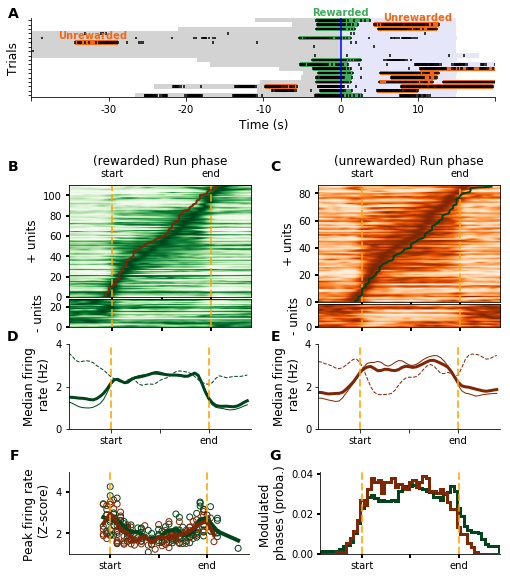

In [9]:


start, end, indexes = detect_running_period(data, minDurationSecond=4, runType="all",maxTimeBetweenBreak=1)
ax=check_period_detection(data, start, end)

fig=plt.gcf()
fig.set_size_inches(cm2inch(17.6),cm2inch(20))

ax.set_position([0.05,0.835,0.93,0.14])
ax.set_ylim([32,14])
ax.set_xlim([-40,20])
ax.set_yticklabels([])
ax.set_xticklabels([""] + list(range(-30,20,10)) + [""])
ax.get_xaxis().set_tick_params(direction='out')
ax.set_xlabel("Time (s)",fontsize=12)
ax.set_ylabel("Trials",fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.text(0,13.5,"Rewarded",ha="center",color=goodBadColors[0],weight="bold")
ax.text(-32,18.7,"Unrewarded",ha="center",color=goodBadColors[1],weight="bold")
ax.text(10,14.5,"Unrewarded",ha="center",color=goodBadColors[1],weight="bold")

ax.set_title("")



### Unit pop analysis
nSideBin=12
yLabels=['+ units','- units']
xLabels=['(rewarded) Run phase','(unrewarded) Run phase']
showXlabel=[True,False]
lineWidthes=[3,1,1]
lineStyles=['-','-','--']
colorMaps=["Greens","Oranges"]

meanSequences=[]

for index,datatocompare in enumerate(firingratesToCompare):
    thiscolorMap=matplotlib.cm.get_cmap(colorMaps[index])

    positiveandnegativearrays=datatocompare["PositiveAndNegativeArrays"]
    populationFiringRate=datatocompare["AllPopFiringRate"]
    nberOfCells=[]
    for array in positiveandnegativearrays:
        nberOfCells.append(array.shape[0])
        
    if index==0:
        gs1 = gridspec.GridSpec(2,1,height_ratios=[nberOfCells[0], nberOfCells[1]],hspace=0.025)
        gs1.update(bottom=0.43,top=0.68,left=0.125,right=0.49)
        
        gs3 = gridspec.GridSpec(1, 1)
        gs3.update(bottom=0.25,top=0.4,left=0.125,right=0.49)
        
        for indexfrate,meanfiringrate in enumerate(populationFiringRate):
            ax1=plt.subplot(gs3[0])
            plt.plot(smooth(meanfiringrate,1),color=thiscolorMap(1.0),linewidth=lineWidthes[indexfrate],linestyle=lineStyles[indexfrate])
    
        
        
    else:
        gs2 = gridspec.GridSpec(2,1,height_ratios=[nberOfCells[0], nberOfCells[1]],hspace=0.025)
        gs2.update(bottom=0.43,top=0.68,left=0.625,right=0.99)
        
        gs4 = gridspec.GridSpec(1, 1)
        gs4.update(bottom=0.25,top=0.4,left=0.625,right=0.99)
        for indexfrate,meanfiringrate in enumerate(populationFiringRate):
            ax1=plt.subplot(gs4[0])
            plt.plot(smooth(meanfiringrate,1),color=thiscolorMap(1.0),linewidth=lineWidthes[indexfrate],linestyle=lineStyles[indexfrate])
        
        
    ax1.set_xlim([0,len(meanfiringrate)])
    ax1.set_ylim([0,4])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_ylabel('Median firing\n rate (Hz)',fontsize=12)
    ax1.set_xticklabels(["start","","end"])
    plt.locator_params(axis='y',nbins=3)
    ax1.axvline(12,color="orange",linestyle='--',linewidth=2,alpha=0.8)
    ax1.axvline(40,color="orange",linestyle='--',linewidth=2,alpha=0.8)


    for arrayindex,array in enumerate(positiveandnegativearrays):
        if index==0:
            ax=plt.subplot(gs1[arrayindex])
        else:
            ax=plt.subplot(gs2[arrayindex])
            
        plotallcells(array,nSideBin,showXlabel[arrayindex],yLabels[arrayindex],Xlabel=xLabels[index],thisCmap=colorMaps[index])

#         if arrayindex==0:
#             plt.plot(np.argmax(array,axis=1),np.arange(array.shape[0]))
        if arrayindex==0:
            meanSequences.append([np.argmax(array,axis=1),np.arange(array.shape[0])])
            
    ax1.set_xticks([nSideBin,array.shape[1]/2,array.shape[1]-nSideBin])
            

            
for index,datatocompare in enumerate(firingratesToCompare):
    positiveandnegativearrays=datatocompare["PositiveAndNegativeArrays"]
    for arrayindex,array in enumerate(positiveandnegativearrays):
        if index==0:
            ax=plt.subplot(gs1[arrayindex])
        else:
            ax=plt.subplot(gs2[arrayindex])
        if arrayindex==0:
            swappedindex=1-index
            thiscolorMap=matplotlib.cm.get_cmap(colorMaps[swappedindex])
            meanSequenceInterp=np.interp(np.linspace(0,meanSequences[swappedindex][1][-1],meanSequences[index][1][-1]+1),meanSequences[swappedindex][1],meanSequences[swappedindex][0])
            plt.plot(meanSequenceInterp,np.arange(array.shape[0]),'-',color=thiscolorMap(1.0),lw=2)
           
            

            
gs5 = gridspec.GridSpec(1,2,wspace=0.4)
gs5.update(bottom=0.03,top=0.175,left=0.125,right=0.99)
colorMaps=["Greens","Oranges"]
#panel A
colors=[]
for colorMap in colorMaps:
    colors.append(matplotlib.cm.get_cmap(colorMap))

### distribution and amplitude zscore(F)
ax1=plt.subplot(gs5[0])
for index,thisModulation in enumerate(modulationsToCompare):
    plt.scatter(thisModulation["IndexPeaks"],thisModulation["ZscoresAtPeak"],marker="o",facecolors='none', edgecolors=colors[index](1.0))
    X=thisModulation["IndexPeaks"]
    Y=thisModulation["ZscoresAtPeak"]
    uniqueX=np.unique(X)
    runningMean=[]
    for thisX in uniqueX:
        runningMean.append(np.mean([thisY[1] for thisY in zip(X,Y) if thisY[0]==thisX]))
    
    plt.plot(uniqueX,smooth(runningMean,1),color=colors[index](1.0),lw=4,ls='-')
    #plt.plot(uniqueX,smooth(runningMean,1)) 
    ax1.set_ylim([1,5])
    ax1.set_ylabel("Peak firing rate \n (Z-score)",fontsize=12)

    
    

### distribution significant bin (G)
ax1=plt.subplot(gs5[1])
for index,thisModulation in enumerate(modulationsToCompare):
    for dataMod in thisModulation:
        if dataMod=="AllModulatedIndex":
            maxminstep=[-0.5,52,1]
            plt.hist(thisModulation[dataMod],np.arange(maxminstep[0],maxminstep[1]+maxminstep[2],maxminstep[2]),histtype='step',normed=True,color=colors[index](1.0),linewidth=3)
            ax1.set_ylabel("Modulated \nphases (proba.)",fontsize=12)
         
    

for plotindex in range(2):
    plt.subplot(gs5[plotindex])
    ax1=plt.gca()
    ax1.set_xlim([0,52])
    ax1.set_xticks([12,52/2,52-12])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_xticklabels(["start","","end"])
    plt.locator_params(axis='y',nbins=3)
    ax1.axvline(12,color="orange",linestyle='--',linewidth=2,alpha=0.8)
    ax1.axvline(40,color="orange",linestyle='--',linewidth=2,alpha=0.8)
    ax1.tick_params(axis='both',which='major',width=2)
    
    
    
figuresLabels={"A":[0.025,0.97],"B":[0.025,0.7],"D":[0.025,0.4],"C":[0.55,0.7],"E":[0.55,0.4],"F":[0.025,0.19],"G":[0.55,0.19]}
for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0],coordinates[1],label,figure=fig,weight='bold',fontsize=14,ha='right' ,va='bottom')
    
    
saveFullName=os.path.join(savePath,'RevisedFig05_RewardVsUnrearded.pdf')
plt.savefig(saveFullName,orientation='landscape',dpi=600,format='pdf')

            

**Figure 5. Population activity in rewarded and unrewarded runs. A)**  Detection of rewarded (green) and unrewarded (orange) runs, in a few trials of an illustrative session. Mean firing rate for all modulated cells during rewarded **(B)** and unrewarded **(C)** runs. In B and C upper panels, continuous running lines represent peak firing rates of all modulated neurons in unrewarded and rewarded runs, respectively. Population mean firing rates of positively-modulated (continuous line), negatively-modulated (dashed line) and all (thick line) neurons during rewarded **(D)** and unrewarded **(E)** runs. **F)**  Z-scored peak firing rates versus run phases (circles) and running mean (continuous line) for rewarded (green) and unrewarded (brown) runs. **G)**  Distribution of all the run phases with significant positive modulation of firing rate, for rewarded (green) and unrewarded (brown) runs.

## End of code.  Below are  stat and toys graph

### Stats compare distribution in pabel E

In [12]:
from scipy import stats
stats.ks_2samp(modulationsToCompare[0]["AllModulatedIndex"],modulationsToCompare[1]["AllModulatedIndex"])

Ks_2sampResult(statistic=0.10456831107168951, pvalue=1.2654915206425596e-05)